In [1]:
import pandas as pd
import numpy as np
import io, os, sys, types
from IPython import get_ipython
from nbformat import read
from IPython.core.interactiveshell import InteractiveShell
from IPython.core.display import HTML
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt
import copy
import json
import csv
import ast
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
get_ipython().magic(u'matplotlib inline')

from scipy.stats import pearsonr
def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

c:\programpool\anaconda\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [20]:
with open("userconfig.json", 'r') as file_obj:
    config = json.load(file_obj)
filedir = config["configdir"]
surveydir = config["surveydir"]

with open(filedir + "dataconfig.json", 'r') as file_obj:
    dataconfig = json.load(file_obj)


In [21]:
merged_uw = pd.read_csv(surveydir+"merged_by_row_uw.csv")
merged_cmu = pd.read_csv(surveydir+"merged_by_row_cmu.csv")

In [ ]:
merged_uw.survey_type.value_counts()

In [22]:
merged_uw_post = merged_uw[merged_uw["survey_type"] == "post"]
merged_cmu_post = merged_cmu[merged_cmu["survey_type"] == "post"]

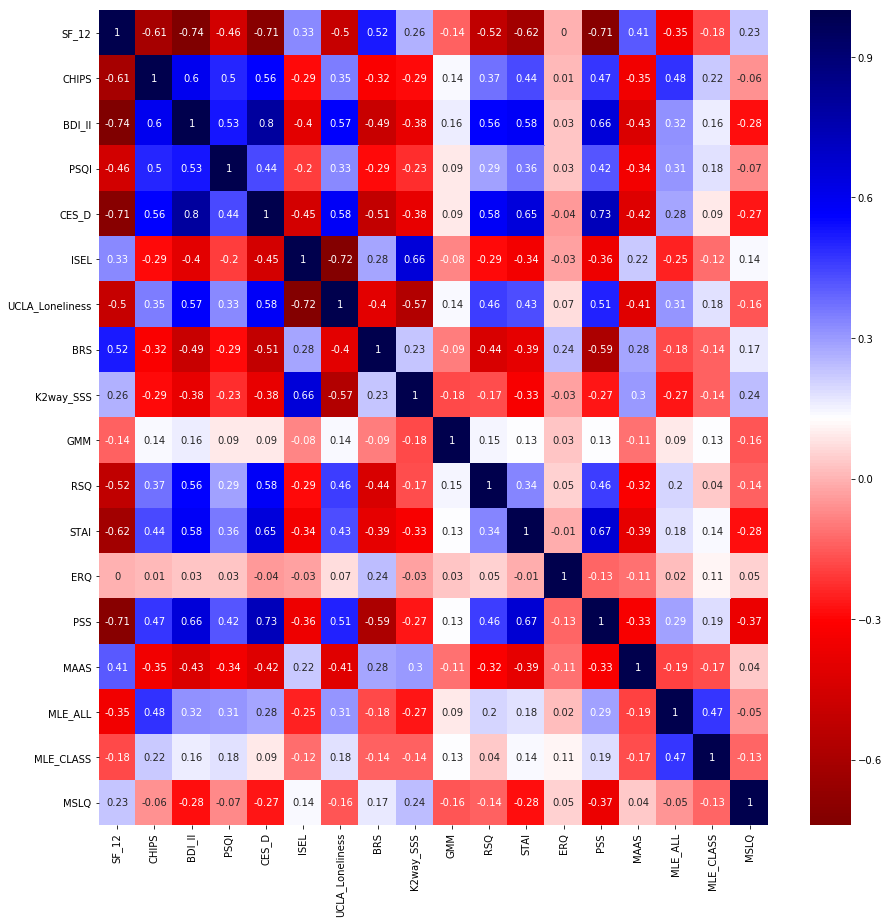

In [23]:
scales = ["SF_12", "CHIPS", "BDI_II", "PSQI", "CES_D", "ISEL", "UCLA_Loneliness",
         "BRS", "K2way_SSS", "GMM", "RSQ", "STAI", "ERQ", "PSS", "MAAS", "MLE_ALL", "MLE_CLASS", "MSLQ"]
df_scales = merged_uw_post[scales]
# df_scales = merged_cmu_post[scales]
cor_scales = df_scales.corr()
cor_scales = cor_scales.round(2)
pval = calculate_pvalues(df_scales) # toto_tico's answer
# create three masks
r1 = cor_scales.applymap(lambda x: '{}.'.format(x))
r2 = cor_scales.applymap(lambda x: '{}*'.format(x))
r3 = cor_scales.applymap(lambda x: '{}**'.format(x))
r4 = cor_scales.applymap(lambda x: '{}***'.format(x))

# apply them where appropriate
cor_scales_mask = cor_scales.mask(pval<=0.1,r1)
cor_scales_mask = cor_scales_mask.mask(pval<=0.05,r2)
cor_scales_mask = cor_scales_mask.mask(pval<=0.01,r3)
cor_scales_mask = cor_scales_mask.mask(pval<=0.001,r4)
cor_scales_mask.to_csv(surveydir + "baseline_cor_uw.csv")
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(cor_scales, xticklabels=cor_scales.columns, yticklabels=cor_scales.columns, annot=True, ax = ax,
            cmap = plt.get_cmap("seismic_r"))
plt.savefig(surveydir + "baseline_cor_uw.png", dpi = 600)

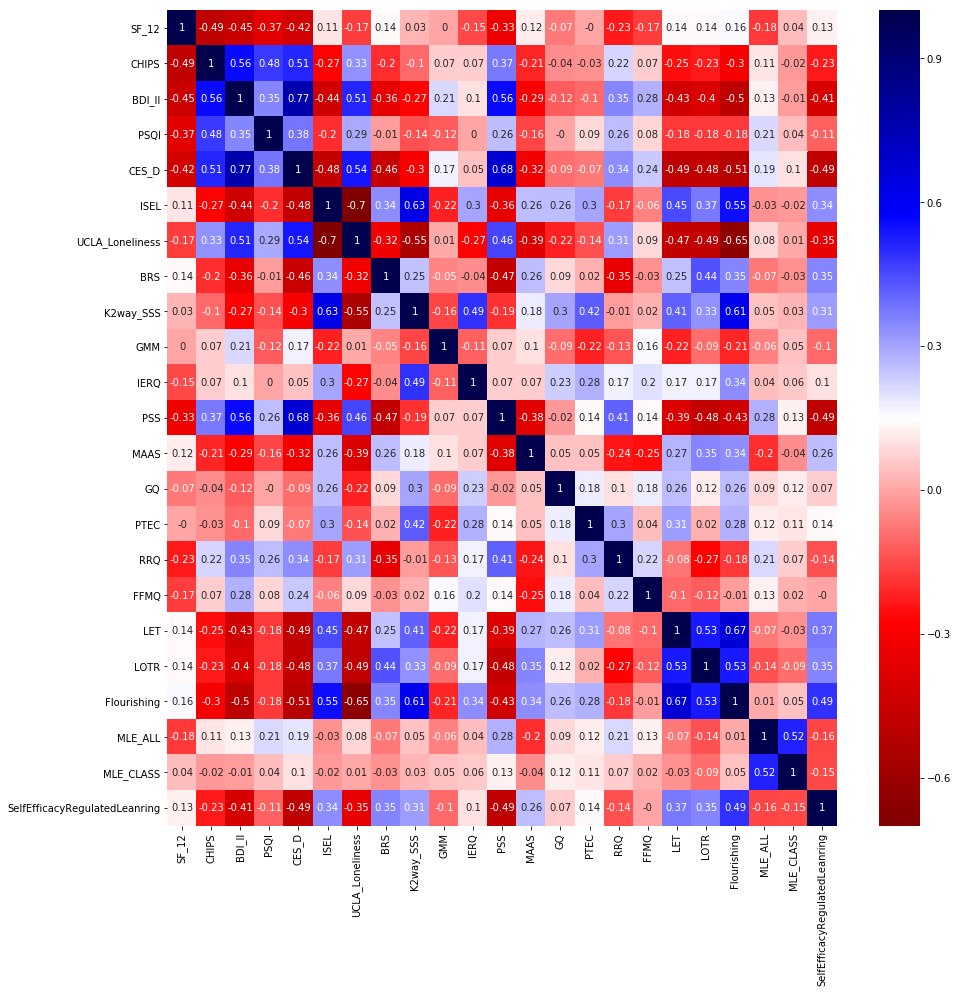

In [24]:
scales = ["SF_12", "CHIPS", "BDI_II", "PSQI", "CES_D", "ISEL", "UCLA_Loneliness",
         "BRS", "K2way_SSS", "GMM", "IERQ", "PSS", "MAAS", "GQ", "PTEC", "RRQ", "FFMQ", "LET", "LOTR", "Flourishing",
          "MLE_ALL", "MLE_CLASS", "SelfEfficacyRegulatedLeanring"]
df_scales = merged_cmu_post[scales]
cor_scales = df_scales.corr()
cor_scales = cor_scales.round(2)
pval = calculate_pvalues(df_scales) # toto_tico's answer
# create three masks
r1 = cor_scales.applymap(lambda x: '{}.'.format(x))
r2 = cor_scales.applymap(lambda x: '{}*'.format(x))
r3 = cor_scales.applymap(lambda x: '{}**'.format(x))
r4 = cor_scales.applymap(lambda x: '{}***'.format(x))

# apply them where appropriate
cor_scales_mask = cor_scales.mask(pval<=0.1,r1)
cor_scales_mask = cor_scales_mask.mask(pval<=0.05,r2)
cor_scales_mask = cor_scales_mask.mask(pval<=0.01,r3)
cor_scales_mask = cor_scales_mask.mask(pval<=0.001,r4)
cor_scales_mask.to_csv(surveydir + "baseline_cor_cmu.csv")
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(cor_scales, xticklabels=cor_scales.columns, yticklabels=cor_scales.columns, annot=True, ax = ax,
            cmap = plt.get_cmap("seismic_r"))
plt.savefig(surveydir + "baseline_cor_cmu.png", dpi = 600)